

# **Project: Reducing Return-Driven Revenue Loss in E-commerce**

This project analyzes customer return behavior using the Olist Brazilian E-commerce dataset. The goal is to identify patterns in returns and suggest data-driven strategies to reduce revenue loss.





In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).





> This code helps us connect to Google Drive where the datasets are stored




In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load datasets
orders = pd.read_csv('/content/drive/MyDrive/Olist_Data/olist_orders_dataset.csv')
customers = pd.read_csv('/content/drive/MyDrive/Olist_Data/olist_customers_dataset.csv',dtype={'customer_zip_code_prefix':str})
sellers = pd.read_csv('/content/drive/MyDrive/Olist_Data/olist_sellers_dataset.csv',dtype={'seller_zip_code_prefix':str})
products = pd.read_csv('/content/drive/MyDrive/Olist_Data/olist_products_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/Olist_Data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/content/drive/MyDrive/Olist_Data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/drive/MyDrive/Olist_Data/olist_order_reviews_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/Olist_Data/olist_geolocation_dataset.csv', dtype={'geolocation_zip_code_prefix': str})
product_category_name_translation = pd.read_csv('/content/drive/MyDrive/Olist_Data/product_category_name_translation.csv')


In [ ]:
# General info about the datasets
orders.info()
customers.info()
sellers.info()
products.info()
order_items.info()
order_payments.info()
order_reviews.info()
geolocation.info()
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null 

In [ ]:
# Shape of the datasets
print(f'orders shape = {orders.shape}')
print(f'customers shape = {customers.shape}')
print(f'sellers shape = {sellers.shape}')
print(f'products shape = {products.shape}')
print(f'order_items shape = {order_items.shape}')
print(f'order_payments shape = {order_payments.shape}')
print(f'order_reviews shape = {order_reviews.shape}')
print(f'geolocation shape = {geolocation.shape}')
print(f'product_category_name_translation shape = {product_category_name_translation.shape}')


orders shape = (99441, 8)
customers shape = (99441, 5)
sellers shape = (3095, 4)
products shape = (32951, 9)
order_items shape = (112650, 7)
order_payments shape = (103886, 5)
order_reviews shape = (99224, 7)
geolocation shape = (1000163, 5)
product_category_name_translation shape = (71, 2)


In [ ]:
# Summary statistics
from IPython.display import display

display(orders.describe())
display(customers.describe())
display(sellers.describe())
display(products.describe())
display(order_items.describe())
display(order_payments.describe())
display(order_reviews.describe())
display(geolocation.describe())
display(product_category_name_translation.describe())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095,3095,3095
unique,3095,2246,611,23
top,9e25199f6ef7e7c347120ff175652c3b,14940,sao paulo,SP
freq,1,49,694,1849


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06
mean,-2.117615e+01,-4.639054e+01
std,5.715866e+00,4.269748e+00
min,-3.660537e+01,-1.014668e+02
25%,-2.360355e+01,-4.857317e+01
50%,-2.291938e+01,-4.663788e+01
75%,-1.997962e+01,-4.376771e+01
max,4.506593e+01,1.211054e+02


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [ ]:
# First few rows
display(orders.head())
display(customers.head())
display(sellers.head())
display(products.head())
display(order_items.head())
display(order_payments.head())
display(order_reviews.head())
display(geolocation.head())
display(product_category_name_translation.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
2,01046,-23.546129,-46.642951,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# Missing Values
display(orders.isnull().sum())
display(customers.isnull().sum())
display(sellers.isnull().sum())
display(products.isnull().sum())
display(order_items.isnull().sum())
display(order_payments.isnull().sum())
display(order_reviews.isnull().sum())
display(geolocation.isnull().sum())
display(product_category_name_translation.isnull().sum())

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


,0
product_category_name,0
product_category_name_english,0


In [ ]:
# Duplicates
print(f'orders duplicate rows : {orders.duplicated().sum()}')
print(f'customers duplicate rows : {customers.duplicated().sum()}')
print(f'sellers duplicate rows : {sellers.duplicated().sum()}')
print(f'products duplicate rows : {products.duplicated().sum()}')
print(f'order_items duplicate rows : {order_items.duplicated().sum()}')
print(f'order_payments duplicate rows : {order_payments.duplicated().sum()}')
print(f'order_reviews duplicate rows : {order_reviews.duplicated().sum()}')
print(f'geolocation duplicate rows : {geolocation.duplicated().sum()}')
print(f'product_category_name_translation duplicate rows : {product_category_name_translation.duplicated().sum()}')

orders duplicate rows : 0
customers duplicate rows : 0
sellers duplicate rows : 0
products duplicate rows : 0
order_items duplicate rows : 0
order_payments duplicate rows : 0
order_reviews duplicate rows : 0
geolocation duplicate rows : 261831
product_category_name_translation duplicate rows : 0


In [ ]:
# Necessary Value Counts
display(orders['order_status'].value_counts())
display(products['product_category_name'].value_counts())
display(order_reviews['review_score'].value_counts())
display(order_payments['payment_type'].value_counts())
display(geolocation['geolocation_city'].value_counts())
display(order_reviews['order_id'].value_counts())

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


,count
review_score,
5,57328
4,19142
1,11424
3,8179
2,3151


,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


,count
geolocation_city,
sao paulo,135800
rio de janeiro,62151
belo horizonte,27805
são paulo,24918
curitiba,16593
...,...
tres irmaos,1
morro chato,1
valao do barro,1


,count
order_id,
03c939fd7fd3b38f8485a0f95798f1f6,3
8e17072ec97ce29f0e1f111e598b0c85,3
c88b1d1b157a9999ce368f218a407141,3
df56136b8031ecd28e200bb18e6ddb2e,3
843be4a0dcdb9716de7652d53af4acab,2
...,...
bad0467c52f23cdc71e9fa139d4a8afd,1
6acf2b0f288195a72858fa65ff2c43c7,1
4634ad13b4414c83524f5efb0ef21a0b,1


## Cleaning the geolocation dataset




In [ ]:
# Dropping the duplicate rows for geolocation
geolocation.drop_duplicates(inplace=True)

In [ ]:
# geolocation cities after dropping duplicate rows
geolocation['geolocation_city'].value_counts()

,count
geolocation_city,
sao paulo,79927
rio de janeiro,35177
são paulo,19718
belo horizonte,19474
curitiba,11263
...,...
banquete,1
guaporanga,1
...arraial do cabo,1


In [ ]:
# Importing the Actual city names csv file
cities=pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')




> This file from a github repository has almost all the city names from Brazil and is used as a reference file to correct the city names in geolocation




In [ ]:
#Update the city names to title format
geolocation['geolocation_city'] = geolocation['geolocation_city'].str.title()




> This code converts the city names to title format so as to match the city names in the reference file





In [ ]:
# Checking for cities that didn't find a perfect match from the reference file
unmatched_cities = geolocation[~geolocation['geolocation_city'].isin(cities['nome'])]

In [ ]:
# Viewing those unmatched cities
unmatched_cities_unique=unmatched_cities['geolocation_city'].unique()
unmatched_cities_unique

array(['Sao Paulo', 'Sao Bernardo Do Campo', 'Taboão Da Serra', ...,
       'Vila Langaro', 'Ciriaco', 'Santa Cecilia Do Sul'], dtype=object)

In [ ]:
# Using fuzzy match to convert the unmatched cities to actual cities with a score_cut_off of 88
%pip install rapidfuzz
from rapidfuzz import process, fuzz

# Convert official city list to a regular Python list for RapidFuzz
official_city_list = cities['nome'].dropna().tolist()

# Set a score cutoff (adjustable)
score_cutoff = 88

# Create a mapping dictionary
fuzzy_city_mapping = {}

for city in unmatched_cities_unique:
    match, score, _ = process.extractOne(city, official_city_list, scorer=fuzz.ratio)
    if score >= score_cutoff:
        fuzzy_city_mapping[city] = match
    else:
        fuzzy_city_mapping[city] = city  # Keep original if no good match

geolocation['geolocation_city_clean'] = geolocation['geolocation_city'].map(fuzzy_city_mapping).fillna(geolocation['geolocation_city'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.4 MB/s eta 0:00:00


In [ ]:
# To display all the rows
pd.set_option('display.max_rows', None)

In [ ]:
# Checking for unmatched cities after running fuzzy match
unmatched_cities_revised=geolocation[~geolocation['geolocation_city_clean'].isin(cities['nome'])]['geolocation_city'].unique()
unmatched_cities_revised

array(['Sãopaulo', 'Sp', 'Sa£O Paulo', ..., 'Ibiaca', 'Estacao',
       'Ciriaco'], dtype=object)

In [ ]:
# Using fuzzy match to clean the left over inconsistent city names with a lower score_cutoff
from rapidfuzz import process, fuzz

# Step 1: Prepare the official city list
official_city_list = cities['nome'].dropna().tolist()

# Step 2: Set score cutoff
score_cutoff = 50  # You can lower this if needed

# Step 3: Create fuzzy match mapping
fuzzy_city_map = {}

for city in unmatched_cities_revised:
    match = process.extractOne(city, official_city_list, scorer=fuzz.ratio)
    if match and match[1] >= score_cutoff:
        fuzzy_city_map[city] = match[0]
    else:
        fuzzy_city_map[city] = city  # Retain original if no good match


# Apply the fuzzy_city_mapping to update the cleaned column
geolocation['geolocation_city_clean'] = geolocation['geolocation_city_clean'].replace(fuzzy_city_map)



> This Code is run to clean the left over cities after running the fuzzy match, this time with a lower score_cutoff



In [ ]:
# Checking for unmatched cities after running fuzzy match for the second
geolocation[~geolocation['geolocation_city_clean'].isin(cities['nome'])]['geolocation_city']

,geolocation_city
429225,Rj
524606,Bacaxa (Saquarema) - Distrito
567225,Bh
770276,Hidreletrica Tucurui
770482,Hidreletrica Tucurui
770544,Hidreletrica Tucurui
770683,Hidreletrica Tucurui
770763,Hidreletrica Tucurui


In [ ]:
# Checking the city and its cleaned version pairs
geolocation[['geolocation_city','geolocation_city_clean']].drop_duplicates().sort_values(by='geolocation_city',ascending=True)

,geolocation_city,geolocation_city_clean
851430,* Cidade,Caridade
525385,...Arraial Do Cabo,Arraial do Cabo
896733,4O. Centenario,Centenário
896977,4º Centenario,Centenário
804356,Abadia De Goias,Abadia de Goiás
650451,Abadia Dos Dourados,Abadia dos Dourados
792364,Abadiania,Abadiânia
792411,Abadiânia,Abadiânia
598309,Abaete,Abaeté
770127,Abaetetuba,Abaetetuba


In [ ]:
#  Manual fixing of left over city names by creating a dictionary
manual_corrections = {
    'Taquaritinga':'Taquaritinga',
    'Ipiau':'Ipiaú',
    'Ipiaui':'Ipiaú',
    'Ipora':'Iporá',
    'Brasilia': 'Brasília',
    'Brasileira':'Brasiléia',
    'Brasileira':'Brasiléia',
    'Bonfim Paulista':'Bonfim Paulista',
    'Sp':'São Paulo',
    'Poa':'Poá',
    'Ana Dias':'Ana Dias',
    'Embu':'Embu das Artes',
    'Maua':'Mauá',
    'Catucaba':'Catuçaba',
    'Sbcampo':'São Bernardo do Campo',
    'Rj':'Rio de Janeiro',
    'Sao Francisco Xavier':'São Francisco Xavier',
    'São Francisco Xavier':'São Francisco Xavier',
    'Sao Francisco Da Praia':'São Francisco da Praia',
    'São Francisco Da Praia':'São Francisco da Praia',
    'Maresias':'Maresias',
    'Campos De Cunha':'Cunha',
    'Jacaré':'Jacaré',
    'Cardeal':'Cardeal da Silva',
    'Jacare (Cabreuva)':'Cabreúva',
    'São Benedito Das Areias':'São Benedito Das Areias',
    'Igarai':'Igarai',
    'Sao Benedito Das Areias':'Sao Benedito Das Areias',
    'Lagoa Branca':'Lagoa Branca',
    'Venda Branca':'Venda Branca',
    'Igaraí':'Igaraí',
    'Aguai':'Aguai',
    'Martinho Prado Junior':'Martinho Prado Júnior',
    'Sao Roque Da Fartura':'São Roque da Fartura',
    'Ipua':'Ipuã',
    'Jurucê':'Jurucê',
    'Juruce':'Jurucê',
    'Guaira':'Guaíra',
    'Ibitiuva':'Ibitiúva',
    'Itapolis':'Itápolis',
    'Curupa':'Curupá',
    "Bandeirantes D'Oeste":"Bandeirantes d'Oeste",
    'Boa Vista Dos Andradas':'Boa Vista dos Andradas',
    'Brasitania':'Brasitânia',
    'Brasitânia':'Brasitânia',
    'São João De Itaguaçu':'São João de Itaguaçu',
    'Termas De Ibira':'Termas de Ibirá',
    'Agulha':'Agulha',
    'Jurupema':'Jurupema',
    'Juritis':'Juritis',
    'Guaranta':'Guarantã',
    'Tres Aliancas':'Três Alianças',
    'Guaracai':'Guaraçaí',
    'Domelia':'Domélia',
    'Jacuba':'Jacuba',
    'Jau':'Jaú',
    'Potunduva':'Potunduva',
    'Bacaxa (Saquarema) - Distrito':'Bacaxá',
    'Bh':'Belo Horizonte',
    'Hidreletrica Tucurui':'Tucuruí',
    'Estacao Cocal':'Estação Cocal',
    'Brazlândia':'Brazlândia',
    'Brazlandia':'Brazlândia',
    'Braço Do Rio':'Braço do Rio',
    'Jacui':'Jacuí',
    'Unai':'Unaí',
    'Serra Dos Dourados':'Serra dos Dourados',
    'Sao Joao De Petropolis':'São João de Petrópolis',
    'Jaguariuna':'Jaguariúna',
    'Goiania':'Goiânia',
    'Itauna':'Itaúna',
    'Itajuba':'Itajubá',
    'Araxa':'Araxá',
    'Uba':'Ubá',
    'Bage':'Bagé',
    'Matao':'Matão',
    'Cambui':'Cambuí',
    'Icara':'Içara',
    'Maringa':'Maringá',
    'Guara':'Guará',
    'Ipe':'Ipê',
    "Santa Bárbara Doeste":"Santa Bárbara d'Oeste",
    "Santa Barbara Doeste":"Santa Bárbara d'Oeste",
    'Marilia':'Marília',
    'Camboriu':'Balneário Camboriú',
    'Camboriú':'Balneário Camboriú',
    'Ceilandia':'Ceilândia',
    'Ipira':'Ipirá',
    'Sabara':'Sabará',
    'Samambaia':'Samambaia',
    'Parai':'Paraí',
    "Arraial D'Ajuda":"Arraial d'Ajuda",
    "Arraial D Ajuda":"Arraial d'Ajuda",
    "Picarras":"Balneário Piçarras",
    'Búzios':'Armação dos Búzios',
    'Buzios':'Armação dos Búzios',
    'Riacho Fundo':'Riacho Fundo',
    'Portao':'Portão',
    'Adamantina':'Guarulhos',
    'Floripa':'Florianópolis',
    'Jaragua':'Jaraguá',
    'Luziania':'Luziânia',
    'Ibia':'Ibiá',
    'Tapirai':'Tapiraí',
    'São José Das Laranjeiras':'São José das Laranjeiras',
    'Sao Jose Das Laranjeiras':'São José das Laranjeiras',
    'Ceilândia':'Ceilândia',
    'Colônia Vitória':'Colônia Vitória',
    'Colonia Vitoria':'Colônia Vitória',
    'Itabata':'Itabatan',
    'Itabatan':'Itabatan',
    'Itabatan (Mucuri)':'Itabatan',
    'Califórnia Da Barra':'Califórnia da Barra',
    'California Da Barra':'Califórnia da Barra',
    'Irapé':'Irapé',
    'Irape':'Irapé',
    'Florínia':'Florínea',
    'Florinia':'Florínea',
    'Florínea':'Florínea',
    'Florinea':'Florínea',
    'Jamapará':'Jamapará',
    'Jamapara':'Jamapará',
    'Sacra Família Do Tinguá':'Sacra Família do Tinguá',
    'Sacra Familia Do Tingua':'Sacra Família do Tinguá',
    'Lídice':'Lídice',
    'Lidice':'Lídice',
    'Japuíba':'Japuíba',
    'Japuiba':'Japuíba',
    'Barra De Sao Joao':'Barra de São João',
    'Barra De São João':'Barra de São João',
    'Bacaxa':'Bacaxá',
    'Bacaxá':'Bacaxá',
    'Braço Do Rio':'Braço do Rio',
    'Braco Do Rio':'Braço do Rio',
    'Costas Da Mantiqueira':'Costas da Mantiqueira',
    'Sao Joao Da Serra Negra':'São João da Serra Negra',
    'Monte Gordo':'Monte Gordo',
    'Catu De Abrantes':'Catu de Abrantes'
    }

# Update only where 'geolocation_city' matches a key in manual_corrections
geolocation.loc[geolocation['geolocation_city'].isin(manual_corrections.keys()),
    'geolocation_city_clean'] = geolocation['geolocation_city'].map(manual_corrections)

In [ ]:
# Replace the city name
geolocation.at[10166, 'geolocation_city_clean'] = 'São Paulo'

In [ ]:
# Checking for the unique cities count after cleaning the geolocation_city column
geolocation['geolocation_city_clean'].unique().shape

(5263,)

In [ ]:
# Checking the unique states in geolocation dataset
geolocation['geolocation_state'].unique()

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

In [ ]:
# State Abbreviation column for readability
state_dictionary={
    "AC" : "Acre",
    "AL" : "Alagoas",
    "AM" : "Amazonas",
    "AP" : "Amapá",
    "BA" : "Bahia",
    "CE" : "Ceará",
    "DF" : "Distrito Federal",
    "ES" : "Espírito Santo",
    "GO" : "Goiás",
    "MA" : "Maranhão",
    "MG" : "Minas Gerais",
    "MS" : "Mato Grosso do Sul",
    "MT" : "Mato Grosso",
    "PA" : "Pará",
    "PB" : "Paraíba",
    "PE" : "Pernambuco",
    "PI" : "Piauí",
    "PR" : "Paraná",
    "RJ" : "Rio de Janeiro",
    "RN" : "Rio Grande do Norte",
    "RO" : "Rondônia",
    "RR" : "Roraima",
    "RS" : "Rio Grande do Sul",
    "SC" : "Santa Catarina",
    "SE" : "Sergipe",
    "SP" : "São Paulo",
    "TO" : "Tocantins"
}

geolocation['geolocation_state_full'] = geolocation['geolocation_state'].map(state_dictionary)

## Cleaning the customers dataset

In [ ]:
# Dropping duplicates
customers.drop_duplicates(inplace=True)

# Lowercase and strip spaces in text columns
customers['customer_city'] = customers['customer_city'].str.strip().str.title()
customers['customer_state'] = customers['customer_state'].str.strip().str.upper()

## Cleaning the sellers dataset

In [ ]:
# Dropping duplicates
sellers.drop_duplicates(inplace=True)

# Standardize seller city/state
sellers['seller_city'] = sellers['seller_city'].str.strip().str.title()
sellers['seller_state'] = sellers['seller_state'].str.strip().str.upper()

display(sellers.isnull().sum())

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


## Cleaning the orders dataset



In [ ]:
# Dropping duplicates and visualising nulls
orders.drop_duplicates(inplace=True)

display(orders.isnull().sum())

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
# Checking the datatypes in the dataset
orders.dtypes

,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,object
order_approved_at,object
order_delivered_carrier_date,object
order_delivered_customer_date,object
order_estimated_delivery_date,object


In [ ]:
# Converting the necessary columns to datetime format
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'],errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'],errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'],errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'],errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'],errors='coerce')

# Verifying conversion
orders.dtypes

,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,datetime64[ns]
order_approved_at,datetime64[ns]
order_delivered_carrier_date,datetime64[ns]
order_delivered_customer_date,datetime64[ns]
order_estimated_delivery_date,datetime64[ns]


## Cleaning the order_items dataset

In [ ]:
# Checking for nulls
order_items.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
# Dropping the duplicates for the dataset
order_items.drop_duplicates(inplace=True)

In [ ]:
#Checking the datatypes for the dataset
order_items.dtypes

,0
order_id,object
order_item_id,int64
product_id,object
seller_id,object
shipping_limit_date,object
price,float64
freight_value,float64


In [ ]:
# Converting the shippin_limit_date to datetime format
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'],errors='coerce')

# Verfying the change
order_items.dtypes

,0
order_id,object
order_item_id,int64
product_id,object
seller_id,object
shipping_limit_date,datetime64[ns]
price,float64
freight_value,float64


## Cleaning the order_payments dataset

In [ ]:
# Checking for nulls in the datset
order_payments.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
#Dropping duplicate rows if any
order_payments.drop_duplicates(inplace=True)

In [ ]:
# Converting the payment types to trim spaces and remove the underscores between them if any
order_payments['payment_type'] = (order_payments['payment_type'].str.strip().str.lower().replace
 ({
          'credit_card'  : 'credit card',
          'debit_card'   : 'debit card',
          'boleto'       : 'boleto',
          'voucher'      : 'voucher',
          'not_defined'  : 'not defined'
  })
)

In [ ]:
# Checking the value_counts for payment_type
order_payments['payment_type'].value_counts()

,count
payment_type,
credit card,76795
boleto,19784
voucher,5775
debit card,1529
not defined,3


In [ ]:
# Dropping the order_ids with 'not defined' as a payment method as it also has no payment value and is not relevant to the analysis
order_payments = order_payments.drop(order_payments[order_payments['payment_type'] == 'not defined'].index)

## Cleaning the products dataset

In [ ]:
# Dropping duplicate rows
products.drop_duplicates(inplace=True)

In [ ]:
# Checking for missing values
products.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
# Replacing the null Product Category Names to 'Unknown'
products['product_category_name'] = products['product_category_name'].fillna('unknown')


In [ ]:
# Checking data types of the columns
products.dtypes

,0
product_id,object
product_category_name,object
product_name_lenght,float64
product_description_lenght,float64
product_photos_qty,float64
product_weight_g,float64
product_length_cm,float64
product_height_cm,float64
product_width_cm,float64


In [ ]:
# Category name value counts
products['product_category_name'].value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [ ]:
# Dropping irrelevant columns
products.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty'], inplace=True)

## Cleaning the order_reviews dataset

In [ ]:
#Dropping duplicate rows if any
order_reviews.drop_duplicates(inplace=True)

In [ ]:
# Checking for missing values
order_reviews.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
# Checking the data types for the columns
order_reviews.dtypes

,0
review_id,object
order_id,object
review_score,int64
review_comment_title,object
review_comment_message,object
review_creation_date,object
review_answer_timestamp,object


In [ ]:
# Converting review_creation_date and review_answer_timestamp columns to date_time format
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'], errors='coerce')
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'], errors='coerce')

order_reviews.dtypes

,0
review_id,object
order_id,object
review_score,int64
review_comment_title,object
review_comment_message,object
review_creation_date,datetime64[ns]
review_answer_timestamp,datetime64[ns]


In [ ]:
order_reviews.groupby('order_id')['review_id'].count().sort_values(ascending=False).head(10)

,review_id
order_id,
03c939fd7fd3b38f8485a0f95798f1f6,3
c88b1d1b157a9999ce368f218a407141,3
8e17072ec97ce29f0e1f111e598b0c85,3
df56136b8031ecd28e200bb18e6ddb2e,3
075a544c5f4ed4bb75f82b160465fe76,2
823384842bb58973b0c88e31c6f94da9,2
d61b915b69851aec8a8865f36cfd793e,2
8e350e1e4254bd7c68913b98bde7d3a7,2
7f13a20e25350f4a55fb2a7c9a2e8d88,2


In [ ]:
# Dropping the irrelevant columns
order_reviews.drop(columns=['review_comment_title', 'review_answer_timestamp'], inplace=True)

## Cleaning the product category name translation dataset

In [ ]:
# Checking for missing values
product_category_name_translation.isnull().sum()

,0
product_category_name,0
product_category_name_english,0


In [ ]:
# Dropping the duplicate_rows
product_category_name_translation.drop_duplicates(inplace=True)

In [ ]:
# Value Counts
product_category_name_translation['product_category_name'].value_counts()

,count
product_category_name,
beleza_saude,1
informatica_acessorios,1
automotivo,1
cama_mesa_banho,1
moveis_decoracao,1
esporte_lazer,1
perfumaria,1
utilidades_domesticas,1
telefonia,1


In [ ]:
# Cleaning the product_category_name_english to make it more readable
product_category_name_translation['product_category_name_english'] = product_category_name_translation['product_category_name_english'].str.strip().str.replace('_',' ').str.title().str.replace('Home Confort','Home Comfort')
product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,Health Beauty
1,informatica_acessorios,Computers Accessories
2,automotivo,Auto
3,cama_mesa_banho,Bed Bath Table
4,moveis_decoracao,Furniture Decor
5,esporte_lazer,Sports Leisure
6,perfumaria,Perfumery
7,utilidades_domesticas,Housewares
8,telefonia,Telephony
9,relogios_presentes,Watches Gifts


In [ ]:
# Building a column named 'chronological_valid' to flag valid chronological orders
orders['chronological_valid'] = (
    (orders['order_approved_at'] >= orders['order_purchase_timestamp']) &
    (orders['order_delivered_carrier_date'] >= orders['order_approved_at']) &
    (orders['order_delivered_customer_date'] >= orders['order_delivered_carrier_date'])
)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,chronological_valid
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,True


In [ ]:
# Creating another column to inculde the chronologically valid delivered,chronologically valid canceled, unavailable orders only
orders['Keep_in_Analysis'] = (
    ((orders['order_status'].isin(['delivered', 'canceled'])) & orders['chronological_valid']) |
    (orders['order_status'] == 'unavailable')
)
orders[orders['Keep_in_Analysis']]['order_status'].value_counts()

,count
order_status,
delivered,95082
unavailable,609
canceled,6


In [ ]:
# Updating the orders dataset with respect to the 'Keep_in_Analysis' column for a valid dataset
orders = orders[orders['Keep_in_Analysis']].copy()

# Dropping the columns we don't need anymore
orders.drop(columns=['Keep_in_Analysis', 'chronological_valid'], inplace=True)

In [ ]:
# Checking the datasets post cleaning
display(orders.head())
display(order_items.head())
display(order_payments.head())
display(order_reviews.head())
display(products.head())
display(sellers.head())
display(geolocation.head())
display(customers.head())
display(product_category_name_translation.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit card,2,128.45


,review_id,order_id,review_score,review_comment_message,review_creation_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_city_clean,geolocation_state_full
0,01037,-23.545621,-46.639292,Sao Paulo,SP,São Paulo,São Paulo
1,01046,-23.546081,-46.644820,Sao Paulo,SP,São Paulo,São Paulo
2,01046,-23.546129,-46.642951,Sao Paulo,SP,São Paulo,São Paulo
3,01041,-23.544392,-46.639499,Sao Paulo,SP,São Paulo,São Paulo
4,01035,-23.541578,-46.641607,Sao Paulo,SP,São Paulo,São Paulo


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


,product_category_name,product_category_name_english
0,beleza_saude,Health Beauty
1,informatica_acessorios,Computers Accessories
2,automotivo,Auto
3,cama_mesa_banho,Bed Bath Table
4,moveis_decoracao,Furniture Decor


In [ ]:
# Checking the shape the datasets post cleaning
display(orders.shape)
display(order_items.shape)
display(order_payments.shape)
display(order_reviews.shape)
display(products.shape)
display(sellers.shape)
display(geolocation.shape)
display(customers.shape)
display(product_category_name_translation.shape)

(95697, 8)

(112650, 7)

(103883, 5)

(99224, 5)

(32951, 6)

(3095, 4)

(738332, 7)

(99441, 5)

(71, 2)

# **Exploratory Data Analysis**






In [ ]:
# Creating the most frequent (cleaned city, full state name) pair per zip code
geo_zip_mode = (
    geolocation
    .groupby('geolocation_zip_code_prefix')
    .apply(lambda x: x[['geolocation_city_clean', 'geolocation_state_full']].mode().iloc[0])
    .reset_index()
)

/tmp/ipython-input-63-182662743.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[['geolocation_city_clean', 'geolocation_state_full']].mode().iloc[0])


In [ ]:
# Merging the customers with their city and state pair
customers = customers.merge(geo_zip_mode,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='left')

customers['customer_state_full'] = customers['customer_state'].map(state_dictionary)

# Dropping the unnecessary columns and renaming them for clarity
customers.drop(columns=['geolocation_zip_code_prefix','geolocation_state_full'], inplace=True)
customers.rename(columns={
    'geolocation_city_clean': 'customer_city_clean'
}, inplace=True)


In [ ]:
# Merging the sellers with their city and state pair
sellers=sellers.merge(geo_zip_mode, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

sellers['seller_state_full'] = sellers['seller_state'].map(state_dictionary)

# Dropping the unnecessary columns and renaming them for clarity
sellers.drop(columns=['geolocation_zip_code_prefix','geolocation_state_full'], inplace=True)
sellers.rename(columns={
    'geolocation_city_clean': 'seller_city_clean'
}, inplace=True)

In [ ]:
# Merging products with product_category_name_translation to get the english translation of the product category
products=products.merge(product_category_name_translation,on='product_category_name',how='left')

In [ ]:
# Creating a dataframe for analysis starting with orders
eda_df = orders.copy()

In [ ]:
# Merger with order_items (product, seller, price)
eda_df = eda_df.merge(order_items, on='order_id', how='left')

In [ ]:
# Merger with products (includes category + translation)
eda_df = eda_df.merge(products, on='product_id', how='left')

In [ ]:
# Merger with order_payments
eda_df = eda_df.merge(order_payments, on='order_id', how='left')

In [ ]:
# Merger with order_reviews
eda_df = eda_df.merge(order_reviews, on='order_id', how='left')

In [ ]:
# Merge with enriched customers (has cleaned city/state)
eda_df = eda_df.merge(customers, on='customer_id', how='left')

In [ ]:
# Merger with enriched sellers (has cleaned city/state + lat/lng if included)
eda_df = eda_df.merge(sellers, on='seller_id', how='left')

In [ ]:
# To display all the columns
pd.set_option('display.max_columns', None)

In [ ]:
# Since we noticed that many order ids don't have a product_category_name. Let's replace it with something meaningful
eda_df['product_category_name'] = eda_df['product_category_name'].fillna('Uncategorised')
eda_df['product_category_name_english'] = eda_df['product_category_name_english'].fillna('Uncategorised')

## Analysis 1 : Order Status Distribution

In [ ]:
# Keep only one record per order_id with its order_status
unique_orders = eda_df[['order_id', 'order_status']].drop_duplicates()

# Calculate the percentage distribution of order_status
order_status_distribution = unique_orders['order_status'].value_counts(normalize=True) * 100

# Convert to DataFrame for order_status_distribution visualization
order_status_df1 = order_status_distribution.reset_index()
order_status_df1.columns = ['order_status', 'percentage']

# Count orders per order_status
order_status_counts = unique_orders['order_status'].value_counts()

# Convert to DataFrame for unique order count per order status visulatisation
order_status_df2 = order_status_counts.reset_index()
order_status_df2.columns = ['order_status', 'order_count']


/tmp/ipython-input-77-1453369719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_status_df1, x='order_status', y='percentage', palette='pastel')


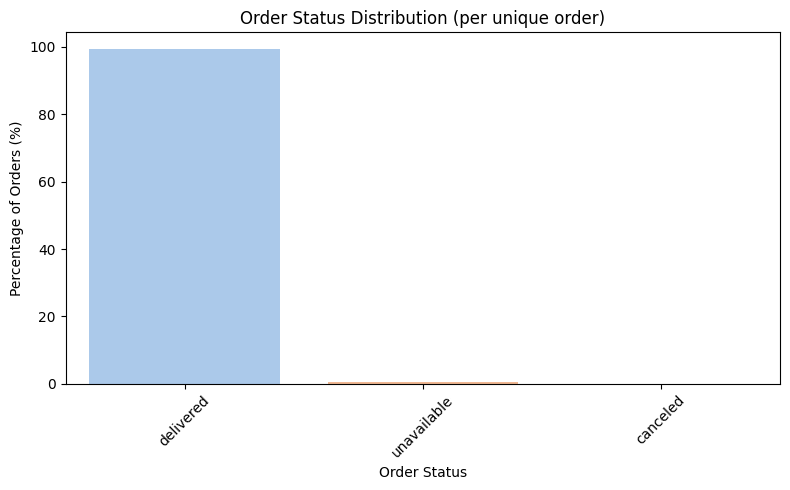

/tmp/ipython-input-77-1453369719.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_status_df2, x='order_status', y='order_count', palette='pastel')


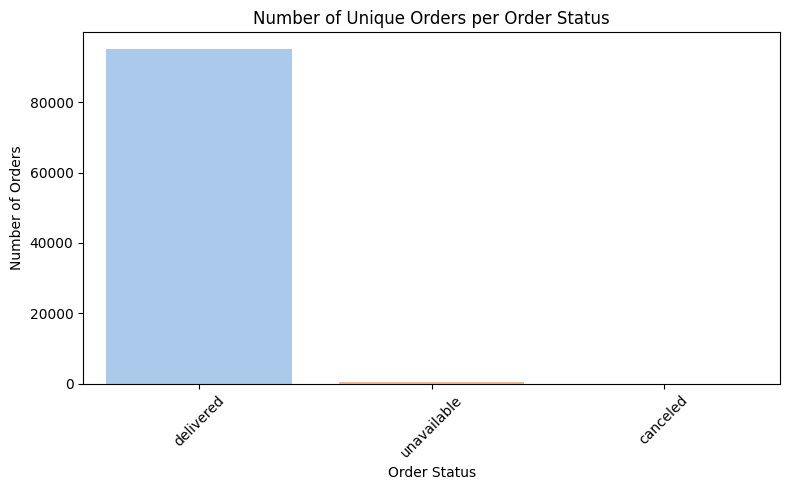

In [ ]:
# Visualising the Order Status Distribution (% of unique orders per order status) on a Bar Chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=order_status_df1, x='order_status', y='percentage', palette='pastel')

plt.title('Order Status Distribution (per unique order)')
plt.xlabel('Order Status')
plt.ylabel('Percentage of Orders (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualising the unique order count per order status on a Bar Chart

plt.figure(figsize=(8,5))
sns.barplot(data=order_status_df2, x='order_status', y='order_count', palette='pastel')

plt.title('Number of Unique Orders per Order Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis 2: Lost Revenue by Product Category

In [ ]:
# Finding the orders that have a potential impact on Revenue loss
problem_orders = eda_df[(eda_df['order_status'].isin(['canceled', 'unavailable'])) & (eda_df['review_score'] <= 2.5)]

In [ ]:
# Creating unique 'order_id', 'product_category_name_english' pairs
unique_problem_orders = problem_orders[['order_id', 'product_category_name_english']].drop_duplicates()

order_counts = unique_problem_orders['product_category_name_english'].value_counts().reset_index()
order_counts.columns = ['product_category_name_english', 'problematic_order_count']

/tmp/ipython-input-80-3456381951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


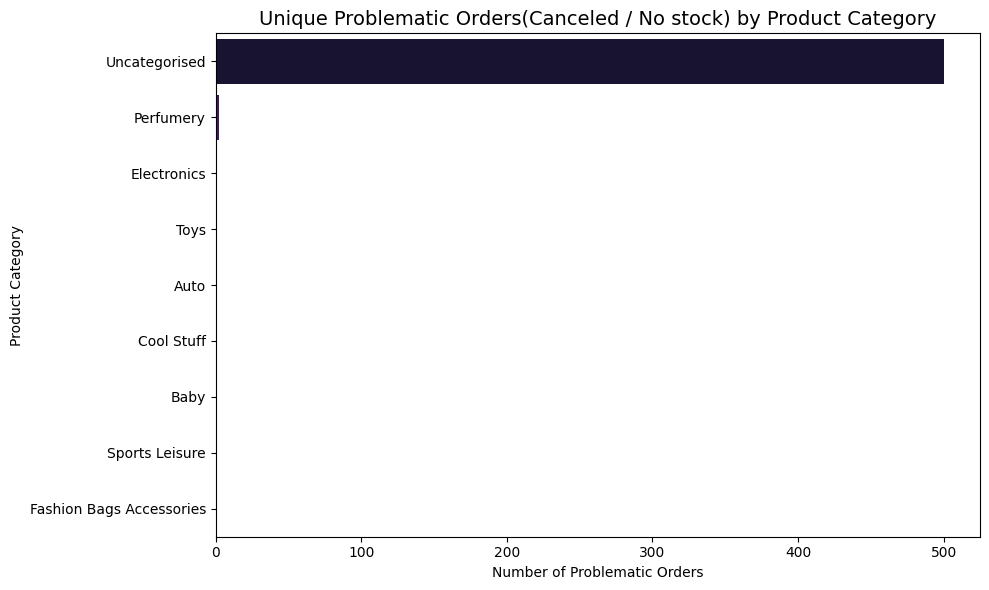

In [ ]:
#Plotting the top 10 categories with most problematic orders
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    data=order_counts.head(10),
    y='product_category_name_english',
    x='problematic_order_count',
    palette='magma'
)

plt.title('Unique Problematic Orders(Canceled / No stock) by Product Category', fontsize=14)
plt.xlabel('Number of Problematic Orders')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the Potential Revenue loss by Product Category

# Dropping duplicates to avoid double-counting same order-category combinations
unique_revenue_loss = problem_orders[['order_id', 'product_category_name_english', 'payment_value']].drop_duplicates()

# Grouping by product category and summing up the payment_value
lost_revenue_by_category = unique_revenue_loss.groupby('product_category_name_english')['payment_value'].sum().reset_index()

# Sorting by highest revenue loss
lost_revenue_by_category = lost_revenue_by_category.sort_values(by='payment_value', ascending=False)

/tmp/ipython-input-82-2283829370.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


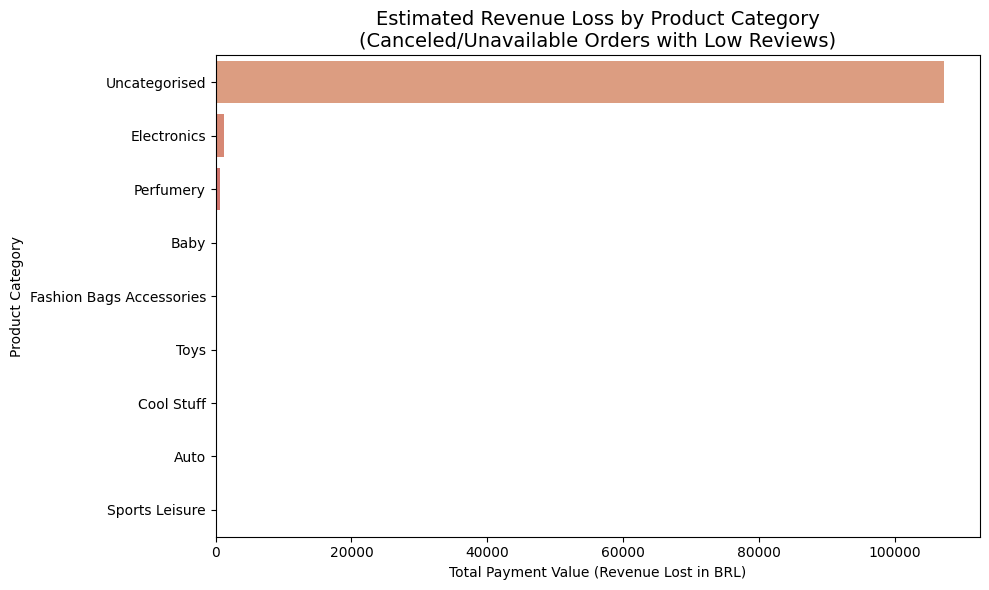

In [ ]:
# Visualising the Revenue loss per Product Categorty
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    data=lost_revenue_by_category.head(10),
    y='product_category_name_english',
    x='payment_value',
    palette='flare'
)

plt.title('Estimated Revenue Loss by Product Category\n(Canceled/Unavailable Orders with Low Reviews)', fontsize=14)
plt.xlabel('Total Payment Value (Revenue Lost in BRL)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


## Analysis 3: Review Score by Order Status

/tmp/ipython-input-83-1839027823.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=unique_reviews, x='order_status', y='review_score', palette='coolwarm')


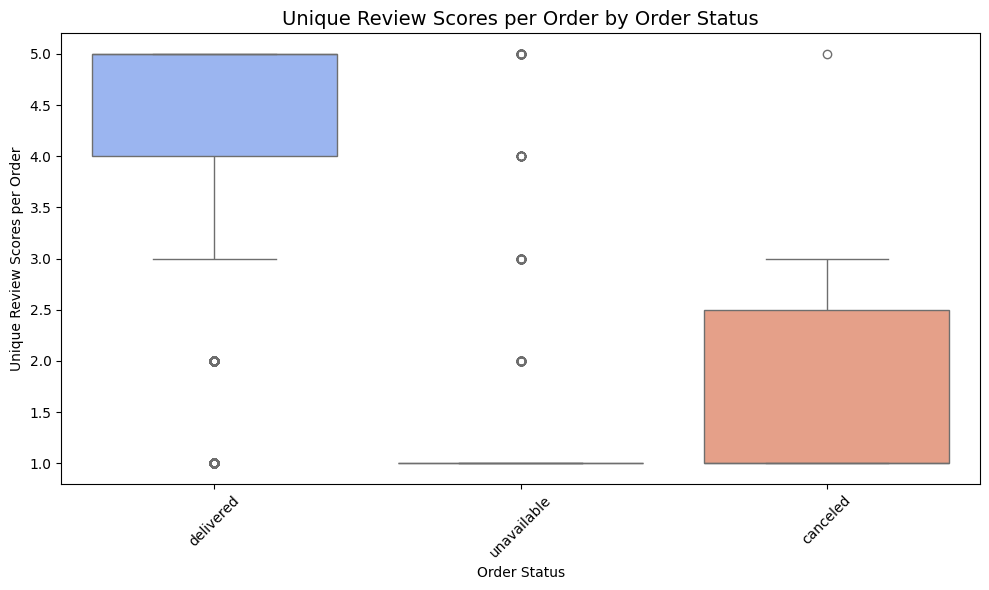

In [ ]:
# Creating a dataframe for unique reviews per order per Order status since some orders have more than 1 review score(avoiding skewing of analysis by duplicates)
unique_reviews = eda_df[['order_id', 'order_status', 'review_score']].drop_duplicates(subset='order_id')

# Visualising the reviews by Order Category on a Box plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=unique_reviews, x='order_status', y='review_score', palette='coolwarm')
plt.title('Unique Review Scores per Order by Order Status', fontsize=14)
plt.ylabel('Unique Review Scores per Order')
plt.xlabel('Order Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis 4: Review Score by Product Category

In [ ]:
# Dataframe for unique reviews per order per category
category_reviews_unique = eda_df[
    eda_df['review_score'].notna() &
    eda_df['product_category_name_english'].notna()
][['order_id', 'product_category_name_english', 'review_score']].drop_duplicates(subset=['order_id'])

# Calculating the mean review score per category
avg_review_by_category = category_reviews_unique.groupby('product_category_name_english')['review_score'].mean().sort_values()

/tmp/ipython-input-85-3357557171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


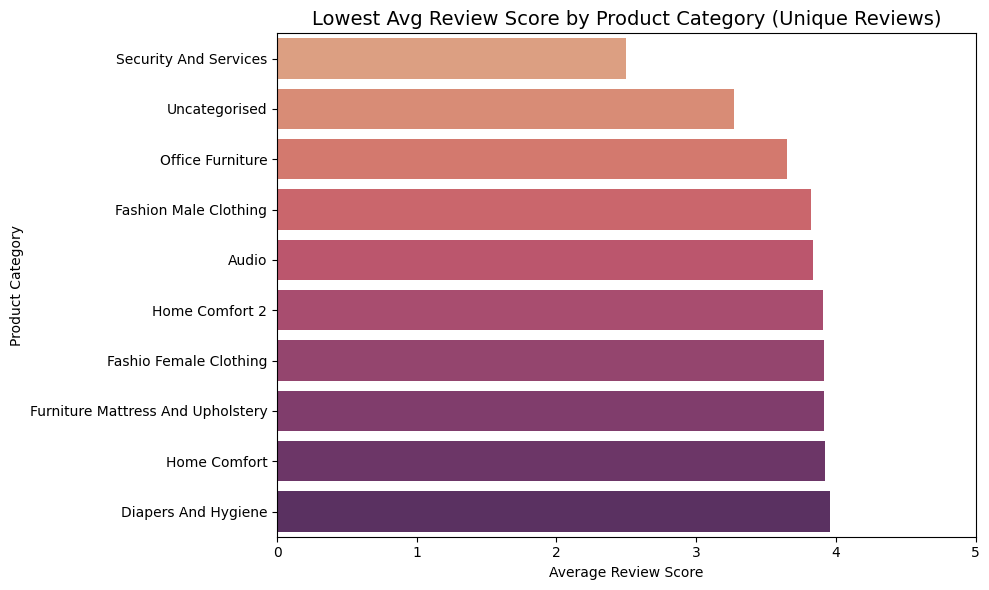

In [ ]:
# Visualising category against its reviews
plt.figure(figsize=(10,6))
sns.barplot(
    x=avg_review_by_category.head(10).values,
    y=avg_review_by_category.head(10).index,
    palette='flare'
)
plt.title('Lowest Avg Review Score by Product Category (Unique Reviews)', fontsize=14)
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

## Analysis 5: Average review score & Late deliveries per Seller

In [ ]:
# Creating a Dataframe to have unique reviews per order per seller
unique_reviews_per_order = eda_df[eda_df['review_score'].notna()][['order_id', 'seller_id', 'review_score']].drop_duplicates(subset='order_id')

review_score_by_seller = (unique_reviews_per_order.groupby('seller_id')['review_score'].mean().sort_values())

/tmp/ipython-input-87-1230942314.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_sellers.values,y=bottom_sellers.index,palette='Reds_r')


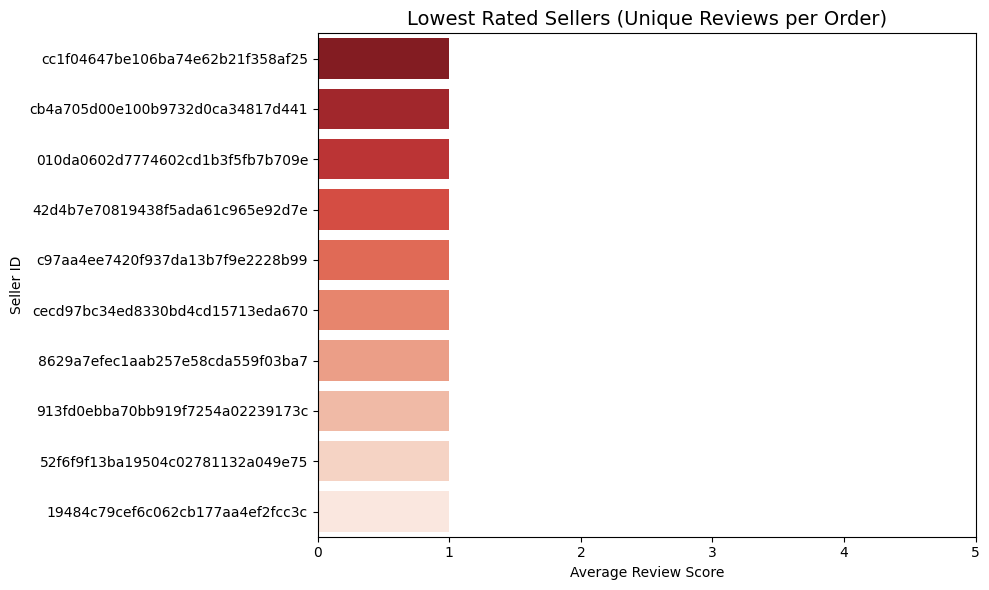

In [ ]:
# Visualising the seller performance by the means of average review scores
bottom_sellers = review_score_by_seller.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=bottom_sellers.values,y=bottom_sellers.index,palette='Reds_r')

plt.title('Lowest Rated Sellers (Unique Reviews per Order)', fontsize=14)
plt.xlabel('Average Review Score')
plt.ylabel('Seller ID')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

In [ ]:
# if the delivery was late or not
eda_df['was_late'] = (eda_df['order_estimated_delivery_date'] < eda_df['order_delivered_customer_date'])

In [ ]:
# Dataframe for all the delivered unique orders per seller with timestamps
delivered = eda_df[
    (eda_df['order_status'] == 'delivered') &
    (eda_df['order_delivered_customer_date'].notna()) &
    (eda_df['order_estimated_delivery_date'].notna())
][['order_id', 'seller_id', 'was_late']].drop_duplicates(subset='order_id')

In [ ]:
# Getting the sellers that delivered orders late
late_delivery_rate_by_seller = (delivered.groupby('seller_id')['was_late'].mean().sort_values(ascending=False))

/tmp/ipython-input-91-2566077987.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_late_sellers.values, y=top_late_sellers.index, palette='Reds')


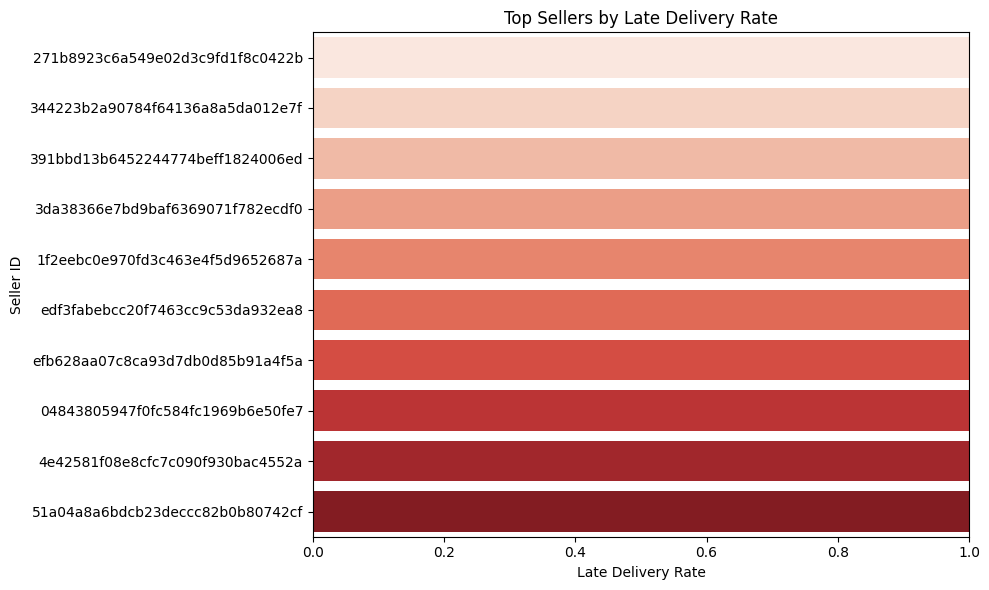

In [ ]:
# Visualising the seller performance by the means of Delivery

top_late_sellers = late_delivery_rate_by_seller.head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=top_late_sellers.values, y=top_late_sellers.index, palette='Reds')
plt.title('Top Sellers by Late Delivery Rate')
plt.xlabel('Late Delivery Rate')
plt.ylabel('Seller ID')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
# Merging both performance factors to assess the high risk sellers
high_risk_sellers = pd.DataFrame({'late_delivery_rate': late_delivery_rate_by_seller,'avg_review_score': review_score_by_seller}).dropna()

# Creating the Boolean column with the criteria
high_risk_sellers['is_high_risk'] = ((high_risk_sellers['late_delivery_rate'] > 0.4) & (high_risk_sellers['avg_review_score'] < 3.5))

In [ ]:
# Getting the sellers satisfying the critera
high_risk_flagged = high_risk_sellers[high_risk_sellers['is_high_risk']]
high_risk_flagged.sort_values(by='late_delivery_rate', ascending=False).head(10)

,late_delivery_rate,avg_review_score,is_high_risk
seller_id,,,
1352e06ae67b410cdae0b2a22361167b,1.0,3.0,True
13d95f0f6f73943d4ceffad0fc2cd32c,1.0,3.0,True
19484c79cef6c062cb177aa4ef2fcc3c,1.0,1.0,True
1b4b28463457a256e9a784ebe2a8f630,1.0,1.0,True
2a50b7ee5aebecc6fd0ff9784a4747d6,1.0,1.0,True
20d53aad4fe5ee93a64f8839609d3586,1.0,1.0,True
586a871d4f1221763fddb6ceefdeb95e,1.0,1.0,True
51a04a8a6bdcb23deccc82b0b80742cf,1.0,1.0,True
4e42581f08e8cfc7c090f930bac4552a,1.0,1.0,True


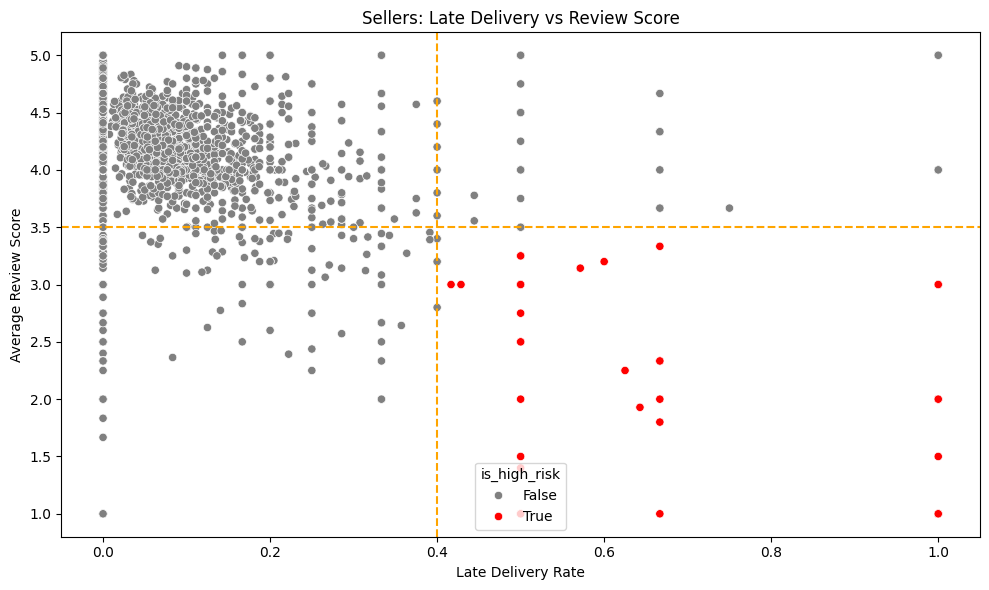

In [ ]:
# Visualising both the sellers against both performace factors to identify high risk underperforming sellers
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=high_risk_sellers,
    x='late_delivery_rate',
    y='avg_review_score',
    hue='is_high_risk',
    palette={True: 'red', False: 'grey'}
)

plt.title('Sellers: Late Delivery vs Review Score')
plt.xlabel('Late Delivery Rate')
plt.ylabel('Average Review Score')
plt.axvline(0.4, color='orange', linestyle='--')
plt.axhline(3.5, color='orange', linestyle='--')
plt.tight_layout()
plt.show()

## Analysis 6: Does Late Delivery Lead to Lower Review Scores?

In [ ]:
# Only keep delivered orders with valid review scores and both timestamps
late_review_df = eda_df[
    (eda_df['order_status'] == 'delivered') &
    (eda_df['review_score'].notna()) &
    (eda_df['order_estimated_delivery_date'].notna()) &
    (eda_df['order_delivered_customer_date'].notna())
][['order_id', 'was_late', 'review_score']].drop_duplicates(subset='order_id')

late_review_df.groupby('was_late')['review_score'].mean()

,review_score
was_late,
False,4.293978
True,2.563131


/tmp/ipython-input-96-804732263.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=late_review_df, x='was_late', y='review_score', palette='Set2')


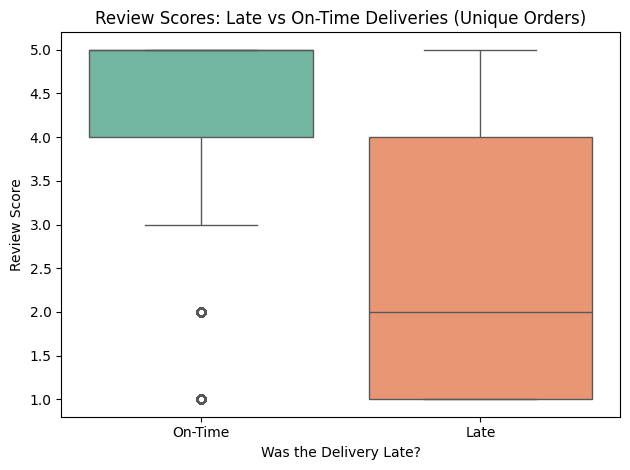

In [ ]:
# Visualize the Delivery time vs the review score
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=late_review_df, x='was_late', y='review_score', palette='Set2')
plt.title('Review Scores: Late vs On-Time Deliveries (Unique Orders)')
plt.xlabel('Was the Delivery Late?')
plt.ylabel('Review Score')
plt.xticks([0, 1], ['On-Time', 'Late'])
plt.tight_layout()
plt.show()

In [ ]:
#eda_df.to_csv('eda_df.csv', index=False)

In [ ]:
vv=eda_df[['order_id','payment_value']]

In [ ]:
vv.groupby('order_id')['payment_value'].sum().sort_values(ascending=False).head(10)

,payment_value
order_id,
03caa2c082116e1d31e67e9ae3700499,109312.64
ab14fdcfbe524636d65ee38360e22ce8,45256.00
1b15974a0141d54e36626dca3fdc731a,44048.00
2cc9089445046817a7539d90805e6e5a,36489.24
e8fa22c3673b1dd17ea315021b1f0f61,30186.00
736e1922ae60d0d6a89247b851902527,29099.52
9aec4e1ae90b23c7bf2d2b3bfafbd943,22346.60
71dab1155600756af6de79de92e712e3,21874.05
912343626f370ead5ef2e85a9d757e22,19457.04
